In [1]:
import requests
url = "https://pems.dot.ca.gov/"
data = {"username": '', "password": ''}
s = requests.session()
res = s.post(url, data)

In [2]:
# https://pems.dot.ca.gov/?city_id=64000&dnode=City&content=elv&tab=stations&pagenum_all=1

In [3]:
#retrieve stations page
res = s.get('https://pems.dot.ca.gov/?city_id=67000&dnode=City&content=elv&tab=stations')

In [4]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(res.text, 'html.parser')

In [5]:
import re

VDS = []
for A in soup.find_all(href=re.compile("station_id")):
#     print(A)
    vds = re.findall(r'\d+', str(A))[1]
#     print(VDS)
    VDS.append(str(vds))

#     https://pems.dot.ca.gov/?city_id=67000&station_id=416144&dnode=VDS
#     break
print(VDS)

['416144', '416145', '402814', '402815', '402816', '402817', '420340', '420341', '404896', '404921', '404886', '404923', '404885', '404906', '404891', '404908', '404889', '402827', '414759', '414758', '404918', '404919', '404920', '404883', '404922', '404884', '404905', '404887', '404907', '404888', '404909', '404528', '401795', '401358', '400255', '401934', '401277', '400868', '403132', '401409', '401516', '406871', '401819', '404569', '401454', '403092', '401357', '401935', '401285', '400043', '403131', '401410', '401408', '401405', '401820', '409335', '409336', '422197', '404617', '422198', '404618', '419056', '400156', '400676', '401486', '400575', '425245', '425246', '400322', '400573', '404647', '404648', '419093', '400746', '400397', '400318', '401470', '400552', '425281', '425282', '401018', '400231']


In [8]:
def getLoc(url):
    vdsres = s.get(url)
    vdssoup = BeautifulSoup(vdsres.text, 'html.parser')
    STREET = re.findall(r'Name=(.*?),', str(vdssoup.find_all('area')[0]))[0]
    COORDS=[]
    for C in vdssoup.find_all(style=re.compile('nowrap'))[-2:]:
        COORDS.append(re.search(r'[+-]?\d+[.]\d+', str(C)).group(0))
    return STREET,COORDS[1],COORDS[0]

In [9]:
print('vds;place;X;Y')
for vds in VDS:
#     print('https://pems.dot.ca.gov/?city_id=67000&station_id={}&dnode=VDS'.format(vds))
    print(';'.join([vds,*getLoc('https://pems.dot.ca.gov/?city_id=67000&station_id={}&dnode=VDS'.format(vds))]))

vds;place;X;Y
416144;500' N of Lake St;-122.469662;37.791909
416145;oppo 500' N of Lake St;-122.469816;37.792051
402814;SFOBB S-curve loc 1;-122.382858;37.793423
402815;SFOBB S-curve loc 1;-122.376772;37.799144
402816;SFOBB S-curve loc 1;-122.37087;37.804603
402817;SFOBB S-curve loc 1;-122.367285;37.807966
420340;SFOBB S-curve loc 1;-122.363109;37.811826
420341;SFOBB S-curve loc 1;-122.362873;37.812048
404896;SFOBB S-curve loc 1;-122.36157;37.813047
404921;SFOBB S-curve loc 1;-122.359342;37.814005
404886;SFOBB S-curve loc 1;-122.357984;37.814439
404923;SFOBB S-curve loc 1;-122.356114;37.815028
404885;SFOBB S-curve loc 1;-122.352728;37.816129
404906;SFOBB S-curve loc 1;-122.351037;37.816684
404891;SFOBB S-curve loc 1;-122.349345;37.817238
404908;SFOBB S-curve loc 2;-122.347825;37.817739
404889;SFOBB S-curve loc 2;-122.346136;37.818297
402827;SFOBB S-Curve;-122.376792;37.799244
414759;SFOBB S-Curve;-122.3631;37.811991
414758;SFOBB S-Curve;-122.362981;37.8121
404918;SFOBB S-Curve;-122.362

In [7]:
rr = 'https://pems.dot.ca.gov/?report_form=1&dnode=VDS&content=loops&tab=det_timeseries&export=text&station_id={}'.format(406871)
# time = '&s_time_id=1625702400&s_time_id_f=07%2F08%2F2021+00%3A00&e_time_id=1626274740&e_time_id_f=07%2F14%2F2021+14%3A59'
opts = '&tod=all&tod_from=0&tod_to=0&dow_0=on&dow_1=on&dow_2=on&dow_3=on&dow_4=on&dow_5=on&dow_6=on&holidays=on&q=flow&q2=speed&gn=5min&agg=on&lane1=on&lane2=on'

In [8]:
def fday(year=2020, month=11, day=6):
    from datetime import datetime,tzinfo,timezone,timedelta

    tdiff = timedelta(hours=14, minutes=0)
    print(tdiff)
    
    tloc1 = datetime(year, month, day+1,0,0)
    tloc2 = datetime(year, month, day+1,23,59)
    
    tgmt1 = str(int((tloc1-tdiff).timestamp()))
    tgmt2 = str(int(((tloc2-tdiff).timestamp())))
    
    tstr1 = tloc1.strftime("%m-%d-%Y %H:%M")
    tstr2 = tloc2.strftime("%m-%d-%Y %H:%M")
    tstr1 = tstr1.replace('-','%2F').replace(':','%3A').replace(' ','+')
    tstr2 = tstr2.replace('-','%2F').replace(':','%3A').replace(' ','+')
    
    template = '&s_time_id={}&s_time_id_f={}&e_time_id={}&e_time_id_f={}'.format(tgmt1,tstr1,tgmt2,tstr2)
    return template
rr+fday(2020,11,6)+opts

14:00:00


'https://pems.dot.ca.gov/?report_form=1&dnode=VDS&content=loops&tab=det_timeseries&export=text&station_id=406871&s_time_id=1604617200&s_time_id_f=11%2F07%2F2020+00%3A00&e_time_id=1604703540&e_time_id_f=11%2F07%2F2020+23%3A59&tod=all&tod_from=0&tod_to=0&dow_0=on&dow_1=on&dow_2=on&dow_3=on&dow_4=on&dow_5=on&dow_6=on&holidays=on&q=flow&q2=speed&gn=5min&agg=on&lane1=on&lane2=on'

In [ ]:
2020-11-06 07:30:30

In [12]:
import pandas as pd
dt=pd.read_csv('pems2.txt',sep='\t')

In [13]:
dt.columns

Index(['5 Minutes', 'Lane 1 Flow (Veh/5 Minutes)', 'Lane 1 Speed (mph)',
       'Lane 2 Flow (Veh/5 Minutes)', 'Lane 2 Speed (mph)',
       'Flow (Veh/5 Minutes)', 'Speed (mph)', '# Lane Points', '% Observed'],
      dtype='object')

Text(0.5, 0, 'Flow')

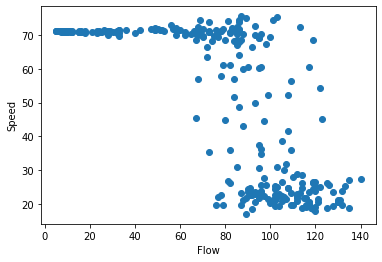

In [21]:
import matplotlib.pyplot as plt
plt.scatter(dt['Lane 1 Flow (Veh/5 Minutes)'],dt['Lane 1 Speed (mph)'])
plt.ylabel('Speed')
plt.xlabel('Flow')

Text(0.5, 0, 'Flow')

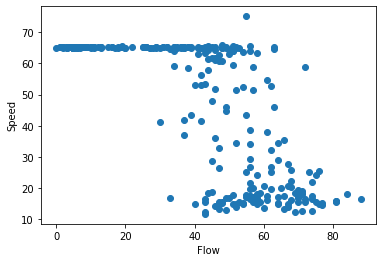

In [41]:
plt.scatter(dt['Lane 2 Flow (Veh/5 Minutes)'],dt['Lane 2 Speed (mph)'])
plt.ylabel('Speed')
plt.xlabel('Flow')

Text(0, 0.5, 'Flow/5m')

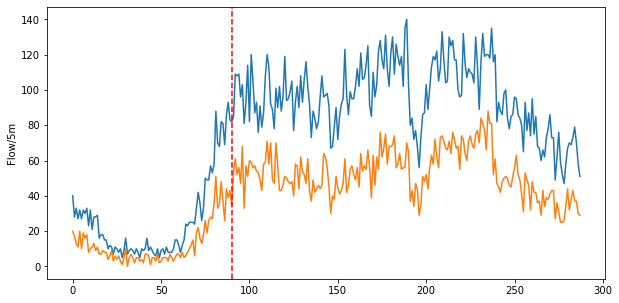

In [39]:
plt.figure(figsize=(10,5))
plt.plot(dt['Lane 1 Flow (Veh/5 Minutes)'])
plt.plot(dt['Lane 2 Flow (Veh/5 Minutes)'])
plt.axvline(x=(7*60+30)/5,ls='--',c='r')
plt.ylabel('Flow/5m')

Text(0.5, 0, 'Time')

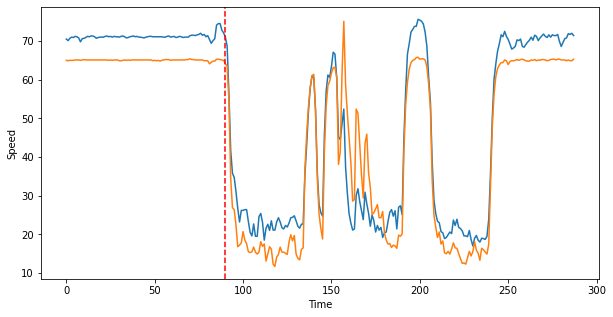

In [36]:
plt.figure(figsize=(10,5))
plt.plot(dt['Lane 1 Speed (mph)'])
plt.plot(dt['Lane 2 Speed (mph)'])
plt.axvline(x=(7*60+30)/5,ls='--',c='r')
plt.ylabel('Speed')
plt.xlabel('Time')

In [228]:
def fweek(year=2021, month=7, day=14): #extract week before
    from datetime import datetime,tzinfo,timezone,timedelta

    tdiff = timedelta(hours=14, minutes=0)
    print(tdiff)
    tweek = timedelta(days=7,hours=0, minutes=0)
    
    tloc1 = datetime(year, month, day+1,0,0)
    tloc2 = datetime(year, month, day+1,23,59)
    
    tgmt1 = str(int((tloc1-tdiff-tweek).timestamp()))
    tgmt2 = str(int(((tloc2-tdiff).timestamp())))
    
    tstr1 = (tloc1-tweek).strftime("%m-%d-%Y %H:%M")
    tstr2 = tloc2.strftime("%m-%d-%Y %H:%M")
    tstr1 = tstr1.replace('-','%2F').replace(':','%3A').replace(' ','+')
    tstr2 = tstr2.replace('-','%2F').replace(':','%3A').replace(' ','+')
    
    template = '&s_time_id={}&s_time_id_f={}&e_time_id={}&e_time_id_f={}'.format(tgmt1,tstr1,tgmt2,tstr2)
    return template
rr+fweek()+opts

14:00:00


'https://pems.dot.ca.gov/?report_form=1&dnode=VDS&content=loops&tab=det_timeseries&export=text&station_id=401819&s_time_id=1625616000&s_time_id_f=07%2F08%2F2021+00%3A00&e_time_id=1626307140&e_time_id_f=07%2F15%2F2021+23%3A59&tod=all&tod_from=0&tod_to=0&dow_0=on&dow_1=on&dow_2=on&dow_3=on&dow_4=on&dow_5=on&dow_6=on&holidays=on&q=flow&q2=speed&gn=5min&agg=on&lane1=on&lane2=on'

In [ ]:
#    tloc = datetime(2021, 7, 8,0,0)
#     tgmt = datetime.fromtimestamp(1625702400)
#     tdiff = (tloc-tgmt)
#     print(tdiff)
    
#     tloc = datetime(2021, 7, 14,23,59)
#     tgmt = datetime.fromtimestamp(1626274740)
#     tdiff = (tloc-tgmt)
#     print(tdiff)
    

In [203]:
tgmt = datetime.fromtimestamp(1626307140)
tgmt.strftime("%m-%d-%Y %H:%M")

'07-15-2021 09:59'

In [ ]:
1626299287000
1625702400

In [ ]:
s_time_id=1625702400&s_time_id_f=07%2F08%2F2021+00%3A00&e_time_id=1626307140&e_time_id_f=07%2F14%2F2021+23%3A59

In [171]:
import time
import os
day = '07-14-2021 23:59'
my_time = time.strptime(day, "%m-%d-%Y %H:%M")
print(int(time.mktime(my_time)))

1626271140


In [ ]:
1626307140

In [179]:


# tloc.strftime("%m-%d-%Y %H:%M")
tloc.timestamp()

1626271140.0

In [180]:
1626307140

1626307140

In [185]:
tloc+tdiff

datetime.datetime(2021, 7, 14, 13, 59)

In [92]:
import time
import datetime
import time as mod_time
from datetime import datetime
from datetime import datetime, timedelta
from datetime import date, timedelta  

today = datetime.now()
yesterday = datetime.now() - timedelta(days=1)
today_time = int((mod_time.mktime(today.timetuple())))
yesterday_time = int((mod_time.mktime(yesterday.timetuple())))
today_unixtime = (today_time*1000)
yesterday_unixtime = (yesterday_time*1000)
print("today timestamp =", today_unixtime)

today timestamp = 1626299287000


In [170]:
import time

# Enter the time in milliseconds, and transfer the time in normal format
def stamptodate(timeNum):
    timeStamp = float(timeNum/1000)
    timeArray = time.gmtime(timeStamp)
    otherStyleTime = time.strftime("%Y-%m-%d %H:%M:%S", timeArray)
    print(otherStyleTime)
timeStamp(1625702400000)

2021-07-08 00:00:00


In [169]:
import time
import os
# os.environ['TZ'] = 'CDT'
# time.tzset()
# my_time = time.strptime("01-07-21", "%d-%m-%y")

day = '07-14-2021 23:59'
my_time = time.strptime(day, "%m-%d-%Y %H:%M")
# day.replace(':','%3A').replace('-','%2F')
# print(my_time)
print(int(time.mktime(my_time)))
# time.gmtime(time.mktime(my_time))

1626271140


In [ ]:
datetime.fromtimestamp(1625702400)

In [ ]:
1626307140

In [125]:
time.gmtime(time.mktime(my_time))

time.struct_time(tm_year=2021, tm_mon=7, tm_mday=14, tm_hour=13, tm_min=59, tm_sec=0, tm_wday=2, tm_yday=195, tm_isdst=0)

In [154]:
from datetime import datetime,tzinfo,timezone,fromtimestamp
tt = datetime(2021, 7, 14,23,59,tzinfo=timezone.utc)
tt.strftime("%m-%d-%Y %H:%M")

AttributeError: type object 'datetime.timezone' has no attribute 'gmt'

In [151]:
tzinfo.tzname('GMT')

TypeError: descriptor 'tzname' requires a 'datetime.tzinfo' object but received a 'str'

In [153]:
tt.timestamp()

1626307140.0

In [166]:
datetime.fromtimestamp(1625702400)

datetime.datetime(2021, 7, 8, 10, 0)

In [ ]:
1626299287000
1625702400

In [155]:
dir(timezone)

['__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getinitargs__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'dst',
 'fromutc',
 'max',
 'min',
 'tzname',
 'utc',
 'utcoffset']

In [160]:
timezone.tzname()

TypeError: descriptor 'tzname' of 'datetime.timezone' object needs an argument

In [28]:
PBF = 'california-latest.osm.pbf'

In [ ]:
UA = "Mozilla/5.0 (X11; Linux x86_64; rv:60.0) Gecko/20100101 Firefox/81.0